In [90]:
import pandas as pd
import torch

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [92]:
import torch.nn as nn
import torch.nn.functional as F # functional has the activation functions

#create tensors from the data
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)


print(X_train)

tensor([[  7.0000, 184.0000,  84.0000,  ...,  35.5000,   0.3550,  41.0000],
        [  6.0000,  85.0000,  78.0000,  ...,  31.2000,   0.3820,  42.0000],
        [  2.0000, 106.0000,  64.0000,  ...,  30.5000,   1.4000,  34.0000],
        ...,
        [  1.0000,  97.0000,  70.0000,  ...,  38.1000,   0.2180,  30.0000],
        [  6.0000, 190.0000,  92.0000,  ...,  35.5000,   0.2780,  66.0000],
        [  4.0000, 144.0000,  58.0000,  ...,  29.5000,   0.2870,  37.0000]])


In [93]:
# artificial neural network
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,
                 hidden1=20,hidden2=20,
                 out_features=2):
        super().__init__() 
        """
        super is a computed indirect reference
        which means that it isolates changes and
        makes sure the children in the layers of
        multiple inheritance are calling 
        the right parents
        """
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        #apply activation function
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [94]:
torch.manual_seed(42)

# create an instance of the model
ann = ANN_Model()

In [95]:
# loss function 
loss_function = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(ann.parameters(), lr = 0.01)

In [96]:
# run model through various epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad() #zeros the gradient before running backward propagation
    loss.backward() # working to minimize the loss function using backward propagation
    optimizer.step() # perform one optimization step each function

Epoch number: 1 with loss 0.7325448393821716
Epoch number: 11 with loss 0.6600156426429749
Epoch number: 21 with loss 0.6357854604721069
Epoch number: 31 with loss 0.6232737302780151
Epoch number: 41 with loss 0.6109457015991211
Epoch number: 51 with loss 0.5912511348724365
Epoch number: 61 with loss 0.5709356665611267
Epoch number: 71 with loss 0.549248218536377
Epoch number: 81 with loss 0.5332964658737183
Epoch number: 91 with loss 0.5167083144187927
Epoch number: 101 with loss 0.5048838257789612
Epoch number: 111 with loss 0.4881722629070282
Epoch number: 121 with loss 0.4804435670375824
Epoch number: 131 with loss 0.4685402512550354
Epoch number: 141 with loss 0.4585517644882202
Epoch number: 151 with loss 0.44937705993652344
Epoch number: 161 with loss 0.4355601668357849
Epoch number: 171 with loss 0.42657968401908875
Epoch number: 181 with loss 0.4182145893573761
Epoch number: 191 with loss 0.4164428114891052
Epoch number: 201 with loss 0.4030608534812927
Epoch number: 211 with 

In [97]:
# predictions
y_pred = []

with torch.no_grad(): # this will decrease memory consumption
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 
        # returns the index with the max
        # element in each position set

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

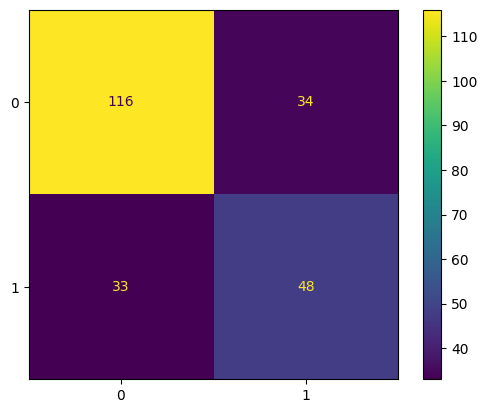

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [63]:
# 1 Adam optimizer is an adaptible variation of the descent algrothim that adapts using non fixed rates of learning for multiple
# variables. This is the best interpretation i could find that used words i understood.


In [101]:
# loss function 
loss_function = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.AdamW(ann.parameters(), lr = 0.01, amsgrad = False)

In [102]:
# run model through various epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad() #zeros the gradient before running backward propagation
    loss.backward() # working to minimize the loss function using backward propagation
    optimizer.step() # perform one optimization step each function

Epoch number: 1 with loss 1.3882454633712769
Epoch number: 11 with loss 0.5014281272888184
Epoch number: 21 with loss 0.4381346106529236
Epoch number: 31 with loss 0.39736732840538025
Epoch number: 41 with loss 0.3751268684864044
Epoch number: 51 with loss 0.36203187704086304
Epoch number: 61 with loss 0.3475160300731659
Epoch number: 71 with loss 0.33353567123413086
Epoch number: 81 with loss 0.3262191712856293
Epoch number: 91 with loss 0.3211970031261444
Epoch number: 101 with loss 0.3158424496650696
Epoch number: 111 with loss 0.3034161627292633
Epoch number: 121 with loss 0.29909756779670715
Epoch number: 131 with loss 0.2920243442058563
Epoch number: 141 with loss 0.2899503707885742
Epoch number: 151 with loss 0.2871265411376953
Epoch number: 161 with loss 0.28248098492622375
Epoch number: 171 with loss 0.2788958251476288
Epoch number: 181 with loss 0.27562862634658813
Epoch number: 191 with loss 0.2807590961456299
Epoch number: 201 with loss 0.2813932001590729
Epoch number: 211 

In [103]:
# predictions
y_pred = []

with torch.no_grad(): # this will decrease memory consumption
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 
        # returns the index with the max
        # element in each position set

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

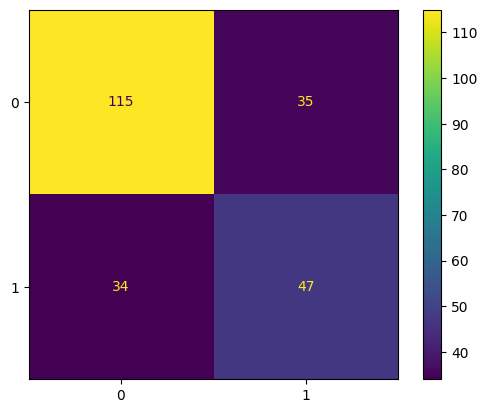

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# 1 part 2 the optimizer is just barely worse as it gets one more incorrect for each possible outcome. I think it is worse because it a specialized
# version of adam and we don't need that specialization